# Specific Heat

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [152]:
M=5
m=10
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt".format(classname,M)

In [153]:
files=glob.glob(data_root + signature)

In [154]:
signature

'BA_NetworkPercolationExplosive_v7_N_*_m_10_M_5_entropy-order_*fast.txt'

In [155]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_10_M_5_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_5_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_10_M_5_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_5_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_5_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

### checking ensemble size

In [156]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes
N= 1000000   En= 20000
N= 800000   En= 20000
N= 600000   En= 20000
N= 400000   En= 20000
N= 1200000   En= 20000


In [157]:
def find_specific_heat(t, H, N):
#     C = -t[1:]*np.diff(H)/np.diff(t)  # noisy data
    C = -(1-t[1:])*np.diff(H)*N
#     print(1/np.diff(t)[0])
    
#     print(np.diff(t)[0])
#     print(np.diff(t)[1234])
#     print(np.diff(t)[-1])
    print(N)
    return C

def find_susceptibility(t, P, N):
    sus=np.diff(P)*N
    return sus

In [122]:
tc=0.72775

## Load data from file

In [158]:
min_limit=0.95
max_limit=0.99

In [159]:
data=dict()
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        N=int(head['N'])
        M=int(head['M'])
        m=int(head['m'])
    X = np.loadtxt(file)
    t=X[:,0]
    index=(t > min_limit) & (t < max_limit)
    data[N] = X[index]
    

1000000
800000
600000
400000
1200000


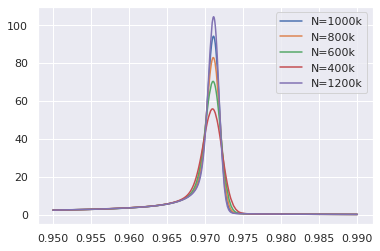

In [160]:
for N in data.keys():
#     print(data[N].shape)
    t, H, P = data[N].T
    X = find_specific_heat(t, H, N)
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    pass
plt.legend()
# plt.xlim([0.723, 0.735])
filename=fig_root + classname + "specific_heat_m{}_M{}".format(m, M)
plt.savefig(filename)

1000000
800000
600000
400000
1200000
[[1000000, 0.9711, 94.22097024600062], [800000, 0.971075, 82.93806595200837], [600000, 0.971042, 70.3669868069968], [400000, 0.97098, 55.816494430400105], [1200000, 0.971117, 104.48711769361148]]


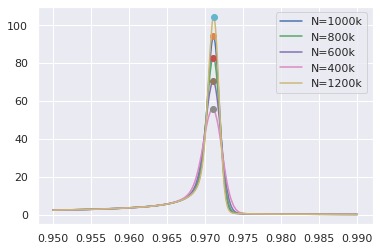

In [164]:
critical = []
for N in data.keys():
#     print(data[N].shape)
    t, H, P = data[N].T

#     sns.distplot(np.diff(t), label="N={}k".format(N//1000))
    
    X = find_specific_heat(t, H, N)
    i = np.argmax(X)
    
    critical.append([N, t[i], X[i]])
    plt.plot(t[1:], X, label='N={}k'.format(N//1000))
    plt.plot(t[i], X[i], 'o')
    
    pass
plt.legend()
# plt.xlim([0.723, 0.735])
print(critical)

In [165]:
def find_exponent(X):
    X=np.array(X)
    print(X.shape)
    plt.plot(np.log(X[:,0]), np.log(X[:,2]), 'o')
    regress = stats.linregress(np.log(X[:,0]), np.log(X[:,2]))
    print(regress)
    y = regress[0] * np.log(X[:,0]) + regress[1]
    plt.plot(np.log(X[:,0]), y)
    return regress

(5, 3)
LinregressResult(slope=0.5709302763399081, intercept=-3.342356303947578, rvalue=0.9999994499231961, pvalue=4.89743656050221e-10, stderr=0.0003457397309127728)
alpha/nu =  0.5709302763399081


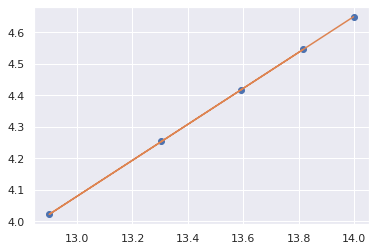

In [166]:
regress = find_exponent(critical)
print("alpha/nu = ", regress[0])


### It is evident that increasing system size gets you closer to the critical point

It flows the relation

$(t(N)-t_c(\infty)) N ^{1/\nu} = const $

$(t(N)-t_c) \sim N ^{-1/\nu}$

$(t(N)-t_c(\infty)) \sim N^{-1/\nu}$

In the limit $N\rightarrow \infty$, $t(N) = t_c(\infty)$

If $1/\nu$ is known then finding $t_c$ is very easy.

In [167]:
def find_tc(X, one_by_nu):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    X=np.array(X)
    
    axs[0].plot(X[:,0], X[:,1], 'o')
    x = X[:,0]**(-one_by_nu)
    y = X[:,1]
    print(X.shape)
    axs[1].plot(x, y, 'o')
    regress = stats.linregress(x, y)
    print(regress)
    y = regress[0] * x + regress[1]
    axs[1].plot(x, y)

(5, 3)
LinregressResult(slope=-0.2293080995692256, intercept=0.9712994685782114, rvalue=-0.999820983708273, pvalue=2.8751534611824014e-06, stderr=0.0025054074197705988)


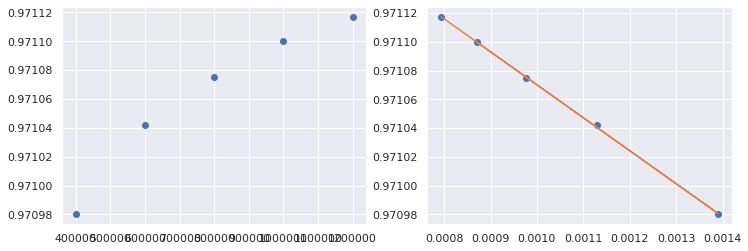

In [169]:
find_tc(critical, 0.51)

In [170]:
tc = 0.9712994685782114

### finding $1/\nu$

In [54]:
h=50

400000
[12843 14719]
600000
[19370 21969]
1200000
[39082 43549]
1000000
[32507 36383]
800000
[25931 29189]


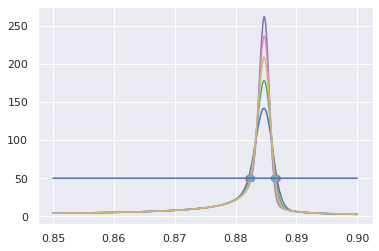

In [63]:
intersection_x = [] # x value at intersections
#     fig = plt.figure(figsize=(5,5), dpi=300)
for N in data.keys():
    t, H, P = data[N].T
    y = find_specific_heat(t, H, N)
    y_h = np.ones(t.shape[0]-1)*h
#     t_prime = (t-tc)*N**(one_by_nu)
    idx = np.argwhere(np.diff(np.sign(y_h - y))).flatten()
    
    print(idx)
    plt.plot(t[1:], y, label='N={}'.format(N))
#     plt.plot(t, y_h)
    plt.plot(t[1:][idx], y_h[idx], 'o')
    #  N, t_left, X_left, t_right, X_right
    
    intersection_x.append([N, t[idx][0], y[idx][0], t[idx][-1], y[idx][-1]])
    pass
plt.plot(t[1:], y_h)
# plt.xlim([0.7, 0.74])
# plt.ylim([0, 0.5])

In [64]:
intersection_x = np.array(intersection_x)

In [65]:
print("N, t_left, X_left, t_right, X_right")
print(intersection_x)

N, t_left, X_left, t_right, X_right
[[4.00000000e+05 8.82110000e-01 4.99767314e+01 8.86800000e-01
  5.01137608e+01]
 [6.00000000e+05 8.82285000e-01 4.99627414e+01 8.86617000e-01
  5.00403067e+01]
 [1.20000000e+06 8.82569000e-01 4.99795232e+01 8.86292000e-01
  5.00484544e+01]
 [1.00000000e+06 8.82508000e-01 4.99711546e+01 8.86384000e-01
  5.00462713e+01]
 [8.00000000e+05 8.82415000e-01 4.99904143e+01 8.86487000e-01
  5.00244793e+01]]


In [66]:
intersection_x[:,1] = np.abs(intersection_x[:,1]-tc)
intersection_x[:,3] = np.abs(intersection_x[:,3]-tc)

LinregressResult(slope=-0.1789794977765643, intercept=-3.641773825377884, rvalue=-0.999627865050121, pvalue=8.617083533755943e-06, stderr=0.002819870237976016)


Text(0, 0.5, '$\\log(t-t_c)$')

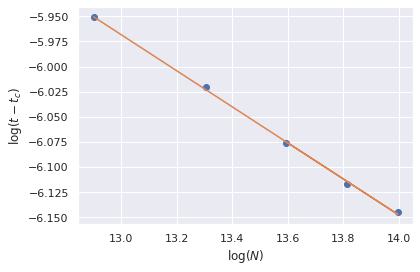

In [68]:
log_data = np.log(intersection_x)
plt.plot(log_data[:,0], log_data[:,1], 'o')
regress = stats.linregress(log_data[:,0], log_data[:,1])
print(regress)
y = regress[0]*log_data[:,0] + regress[1]
plt.plot(log_data[:,0], y)
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(t-t_c)$")

In [85]:
print(1/1.946)
print(0.884/1.946)

0.513874614594039
0.45426515930113054


#### Data Collapse

In [183]:
one_by_nu = 0.5121847779791164
alpha_by_nu=0.5709302763399081
tc= 0.9712994685782114

1000000
800000
600000
400000
1200000


(-5, 5)

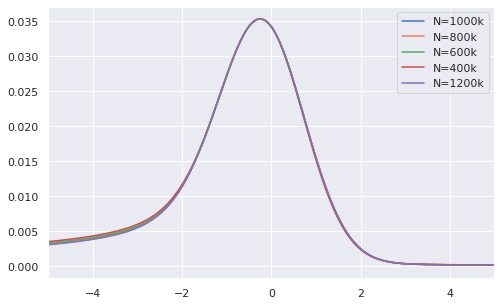

In [186]:
# tc -= 0.0001
one_by_nu += 0.002
plt.figure(figsize=(8, 5))
for N in data.keys():
#     print(data[N].shape)
    t, H, P = data[N].T
    X = find_specific_heat(t, H, N)
    x=(t-tc)*N**(one_by_nu)
    y=X*N**(-alpha_by_nu)
    plt.plot(x[1:], y, label='N={}k'.format(N//1000))
    pass
plt.legend()
plt.xlim([-5, 5])

In [182]:
one_by_nu

0.5201847779791164

In [187]:
one_by_nu

0.5161847779791164